<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Actividades/Actividad%207/Actividad_7_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [1]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git


Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 314 (delta 44), reused 63 (delta 14), pack-reused 219
Receiving objects: 100% (314/314), 11.16 MiB | 18.86 MiB/s, done.
Resolving deltas: 100% (138/138), done.


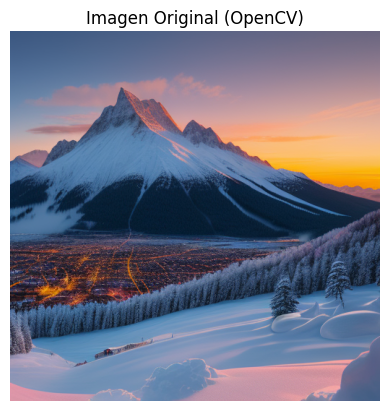

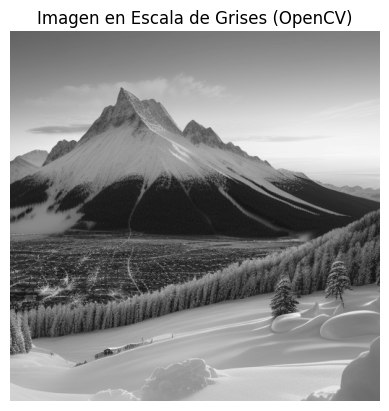

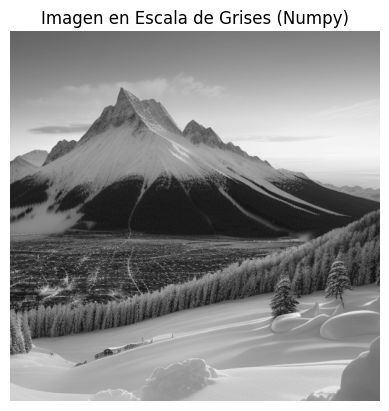

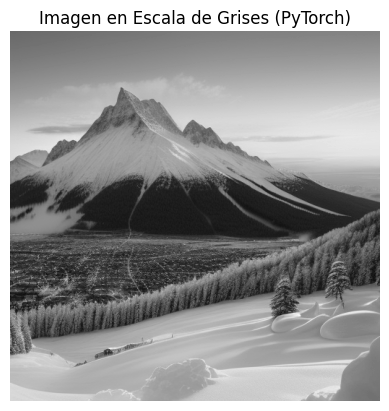

In [46]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con matplotlib

# Mostrar la imagen original usando matplotlib
plt.imshow(imagen_cv2_rgb)
plt.title('Imagen Original (OpenCV)')
plt.axis('off')
plt.show()

# Transformar la imagen a escala de grises usando OpenCV
imagen_gris_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)
# Guardar la imagen transformada
cv2.imwrite('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/imagen_gris_cv2.png', imagen_gris_cv2)

# Mostrar la imagen en escala de grises usando matplotlib
plt.imshow(imagen_gris_cv2, cmap='gray')
plt.title('Imagen en Escala de Grises (OpenCV)')
plt.axis('off')
plt.show()

# Transformar la imagen a escala de grises usando Numpy
imagen_gris_np = cv2.cvtColor(imagen_cv2_rgb, cv2.COLOR_RGB2GRAY)
# Guardar la imagen transformada
plt.imsave('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/imagen_gris_np.png', imagen_gris_np, cmap='gray')

# Mostrar la imagen en escala de grises usando matplotlib
plt.imshow(imagen_gris_np, cmap='gray')
plt.title('Imagen en Escala de Grises (Numpy)')
plt.axis('off')
plt.show()

# Transformar la imagen a tensor usando PyTorch
imagen_tensor = torch.from_numpy(imagen_cv2_rgb).permute(2, 0, 1).float() / 255.0  # Convertir a tensor y normalizar

# Transformar la imagen a escala de grises usando PyTorch
imagen_gris_tensor = torch.mean(imagen_tensor, dim=0)  # Usar torch.mean para promediar los canales
imagen_gris_tensor = imagen_gris_tensor.numpy()  # Convertir de vuelta a numpy

# Guardar la imagen transformada
plt.imsave('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/imagen_gris_torch.png', imagen_gris_tensor, cmap='gray')

# Mostrar la imagen en escala de grises usando matplotlib
plt.imshow(imagen_gris_tensor, cmap='gray')
plt.title('Imagen en Escala de Grises (PyTorch)')
plt.axis('off')
plt.show()


## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

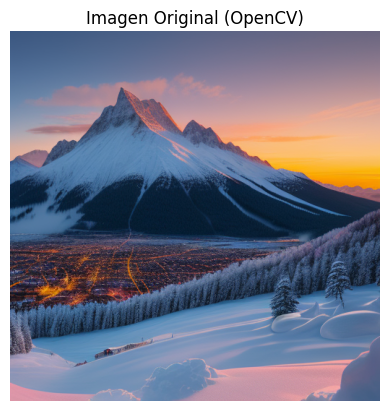

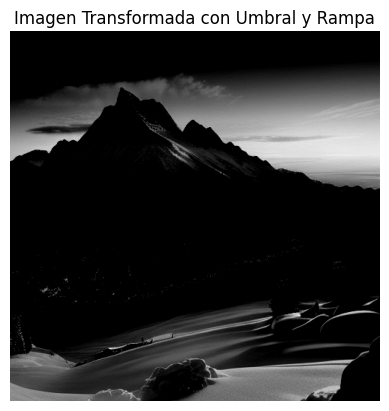

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con matplotlib

# Mostrar la imagen original usando matplotlib
plt.imshow(imagen_cv2_rgb)
plt.title('Imagen Original (OpenCV)')
plt.axis('off')
plt.show()

# Definir la función de transformación puntual (rampa con umbral)
def umbral_rampa(imagen, umbral, pendiente):
    # Crear una copia de la imagen para no modificar la original
    imagen_transformada = imagen.copy().astype(float)

    # Aplicar la transformación
    imagen_transformada = np.clip(pendiente * (imagen_transformada - umbral), 0, 255)

    return imagen_transformada.astype(np.uint8)

# Definir los parámetros de la rampa
umbral = 128
pendiente = 1.5

# Aplicar la transformación puntual a la imagen en escala de grises
imagen_gris_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)
imagen_transformada = umbral_rampa(imagen_gris_cv2, umbral, pendiente)

# Mostrar la imagen transformada usando matplotlib
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada con Umbral y Rampa')
plt.axis('off')
plt.show()


#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



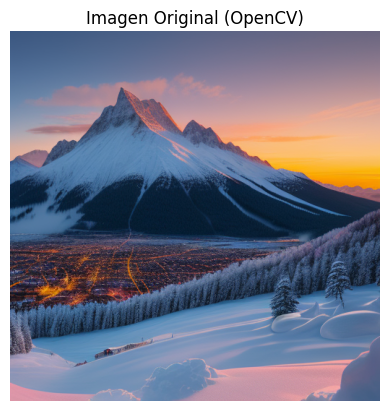

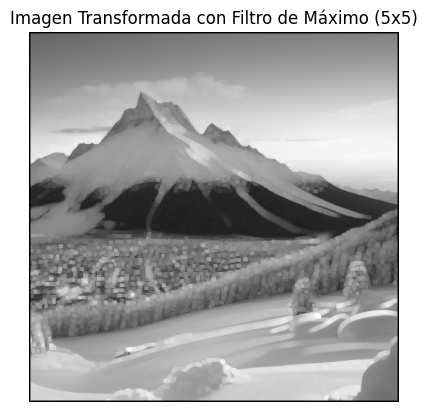

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con matplotlib

# Mostrar la imagen original usando matplotlib
plt.imshow(imagen_cv2_rgb)
plt.title('Imagen Original (OpenCV)')
plt.axis('off')
plt.show()

# Convertir la imagen a escala de grises
imagen_gris_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)

# Obtener las dimensiones de la imagen
filas, columnas = imagen_gris_cv2.shape

# Crear una imagen de salida vacía
imagen_transformada = np.zeros_like(imagen_gris_cv2)

# Definir el tamaño de la ventana
tamaño_ventana = 5
mitad_ventana = tamaño_ventana // 2

# Recorrer la imagen aplicando la transformación de vecindad
for i in range(mitad_ventana, filas - mitad_ventana):
    for j in range(mitad_ventana, columnas - mitad_ventana):
        # Extraer la vecindad de 5x5
        ventana = imagen_gris_cv2[i-mitad_ventana:i+mitad_ventana+1, j-mitad_ventana:j+mitad_ventana+1]
        # Encontrar el valor máximo en la vecindad
        valor_maximo = np.max(ventana)
        # Asignar el valor máximo al píxel correspondiente en la imagen de salida
        imagen_transformada[i, j] = valor_maximo

# Mostrar la imagen transformada usando matplotlib
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada con Filtro de Máximo (5x5)')
plt.axis('off')
plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

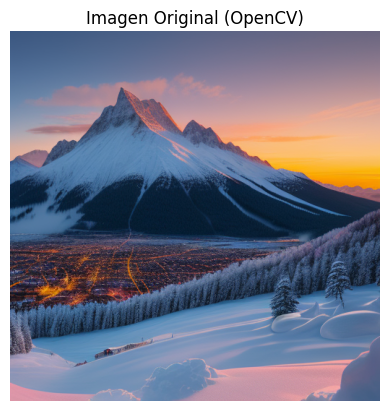

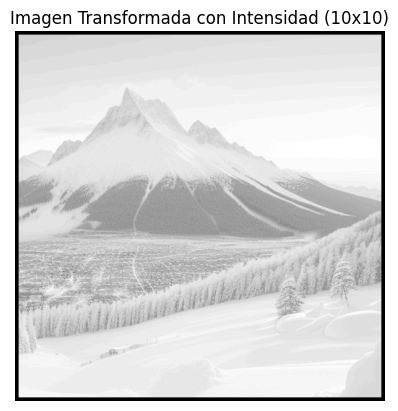

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con matplotlib

# Mostrar la imagen original usando matplotlib
plt.imshow(imagen_cv2_rgb)
plt.title('Imagen Original (OpenCV)')
plt.axis('off')
plt.show()

# Convertir la imagen a escala de grises
imagen_gris_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)

# Definir la transformación de intensidad
def transformacion_intensidad(imagen, c):
    # Aplicar la transformación s = c * log(1 + r)
    imagen_transformada = c * np.log1p(imagen.astype(float))
    # Normalizar a valores en el rango [0, 255]
    imagen_transformada = np.clip(imagen_transformada, 0, 255)
    return imagen_transformada.astype(np.uint8)

# Definir los parámetros
c = 10  # Coeficiente c
tamaño_ventana = 10
mitad_ventana = tamaño_ventana // 2

# Obtener las dimensiones de la imagen
filas, columnas = imagen_gris_cv2.shape

# Crear una imagen de salida vacía
imagen_transformada = np.zeros_like(imagen_gris_cv2)

# Recorrer la imagen aplicando la transformación de vecindad
for i in range(mitad_ventana, filas - mitad_ventana):
    for j in range(mitad_ventana, columnas - mitad_ventana):
        # Extraer la vecindad de 10x10
        ventana = imagen_gris_cv2[i-mitad_ventana:i+mitad_ventana+1, j-mitad_ventana:j+mitad_ventana+1]
        # Aplicar la transformación de intensidad a la vecindad
        ventana_transformada = transformacion_intensidad(ventana, c)
        # Asignar el valor central de la vecindad transformada al píxel correspondiente en la imagen de salida
        imagen_transformada[i, j] = ventana_transformada[mitad_ventana, mitad_ventana]


# Mostrar la imagen transformada usando matplotlib
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada con Intensidad (10x10)')
plt.axis('off')
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

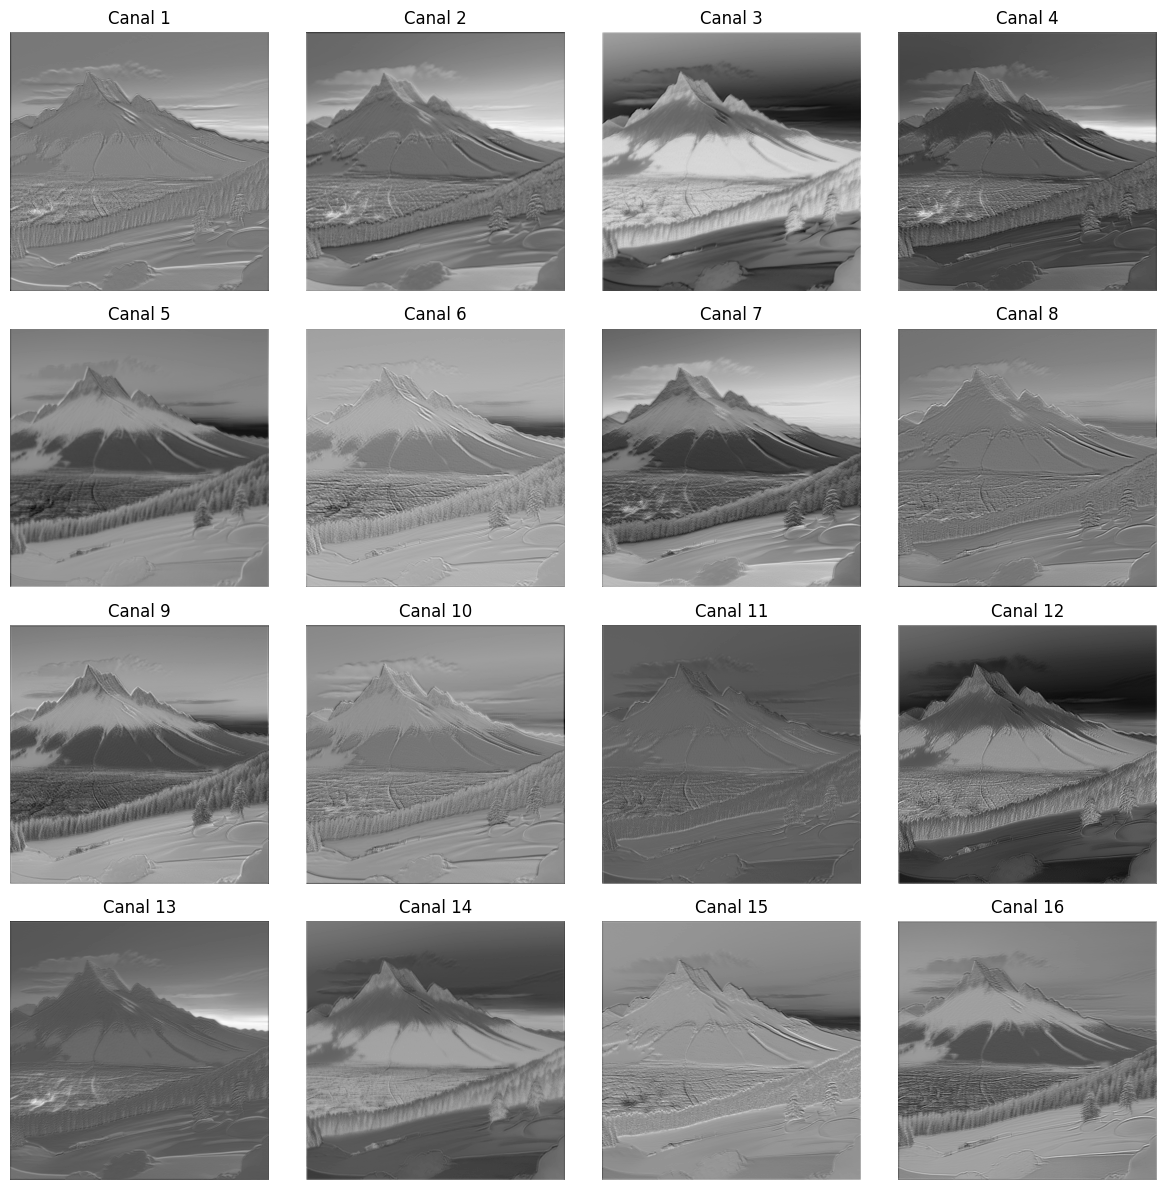

In [50]:
import numpy as np
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

# Cargar la imagen usando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con matplotlib

# Convertir la imagen a tensor de PyTorch
imagen_tensor = torch.from_numpy(imagen_cv2_rgb).permute(2, 0, 1).float() / 255.0  # Convertir a tensor y normalizar
imagen_tensor = imagen_tensor.unsqueeze(0)  # Añadir dimensión de batch

# Definir las capas de convolución
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = self.conv3(x)
        return x

# Instanciar la red y aplicar las convoluciones
red = ConvNet()
salida = red(imagen_tensor)

# Convertir la salida a numpy para visualizar
salida_np = salida.detach().squeeze(0).numpy()

# Mostrar cada uno de los 16 canales resultantes
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(salida_np[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Canal {i+1}')
plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


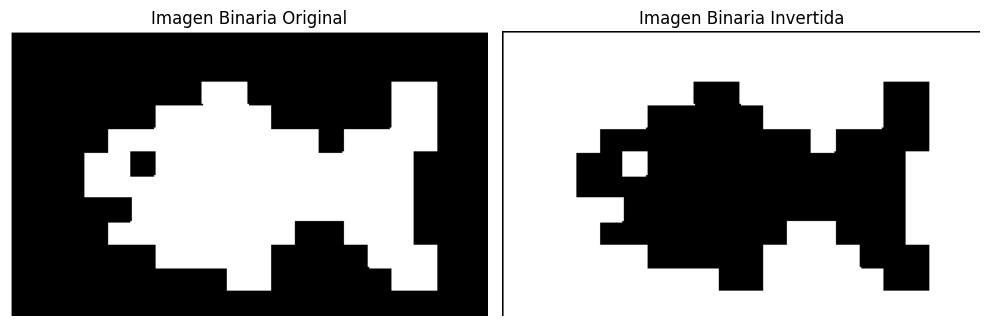

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ruta de la imagen binaria
ruta_imagen = '/content/Figura-5-Representacion-de-una-imagen-binaria.ppm.png'

# Cargar la imagen usando PIL y convertirla a escala de grises
imagen = Image.open(ruta_imagen).convert('L')

# Convertir la imagen a un array de numpy
imagen_np = np.array(imagen)

# Asegurarse de que la imagen sea binaria (0 o 255)
imagen_binaria = np.where(imagen_np > 128, 1, 0)

# Invertir la imagen binaria
imagen_invertida = 1 - imagen_binaria

# Convertir de nuevo la imagen invertida a 0 y 255
imagen_invertida = imagen_invertida * 255

# Convertir el array de numpy de vuelta a una imagen
imagen_invertida_pil = Image.fromarray(imagen_invertida.astype(np.uint8))

# Mostrar la imagen original y la invertida
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_binaria * 255, cmap='gray')
plt.title('Imagen Binaria Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_invertida, cmap='gray')
plt.title('Imagen Binaria Invertida')
plt.axis('off')

plt.tight_layout()
plt.show()




### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



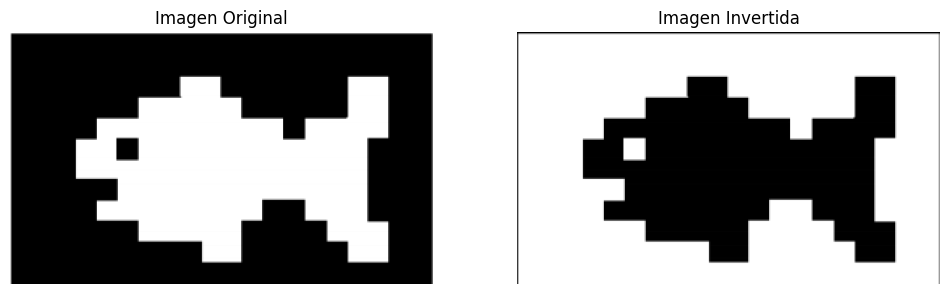

In [52]:
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = '/content/Figura-5-Representacion-de-una-imagen-binaria.ppm.png'

# Cargar la imagen utilizando OpenCV
imagen_cv2 = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Convertir la imagen a un tensor de PyTorch
transformacion = transforms.Compose([transforms.ToTensor()])
imagen_tensor = transformacion(imagen_cv2)

# Invertir la imagen binaria utilizando PyTorch
imagen_invertida_tensor = 1 - imagen_tensor

# Convertir la imagen invertida de tensor a array de numpy
imagen_invertida_np = imagen_invertida_tensor.numpy()

# Escalar la imagen invertida para mostrarla correctamente
imagen_invertida_np *= 255
imagen_invertida_np = imagen_invertida_np.astype(np.uint8)

# Invertir la imagen binaria utilizando OpenCV
imagen_invertida_cv2 = cv2.bitwise_not(imagen_cv2)

# Mostrar la imagen invertida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen_cv2, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagen_invertida_cv2, cmap='gray')
plt.title('Imagen Invertida')
plt.axis('off')
plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

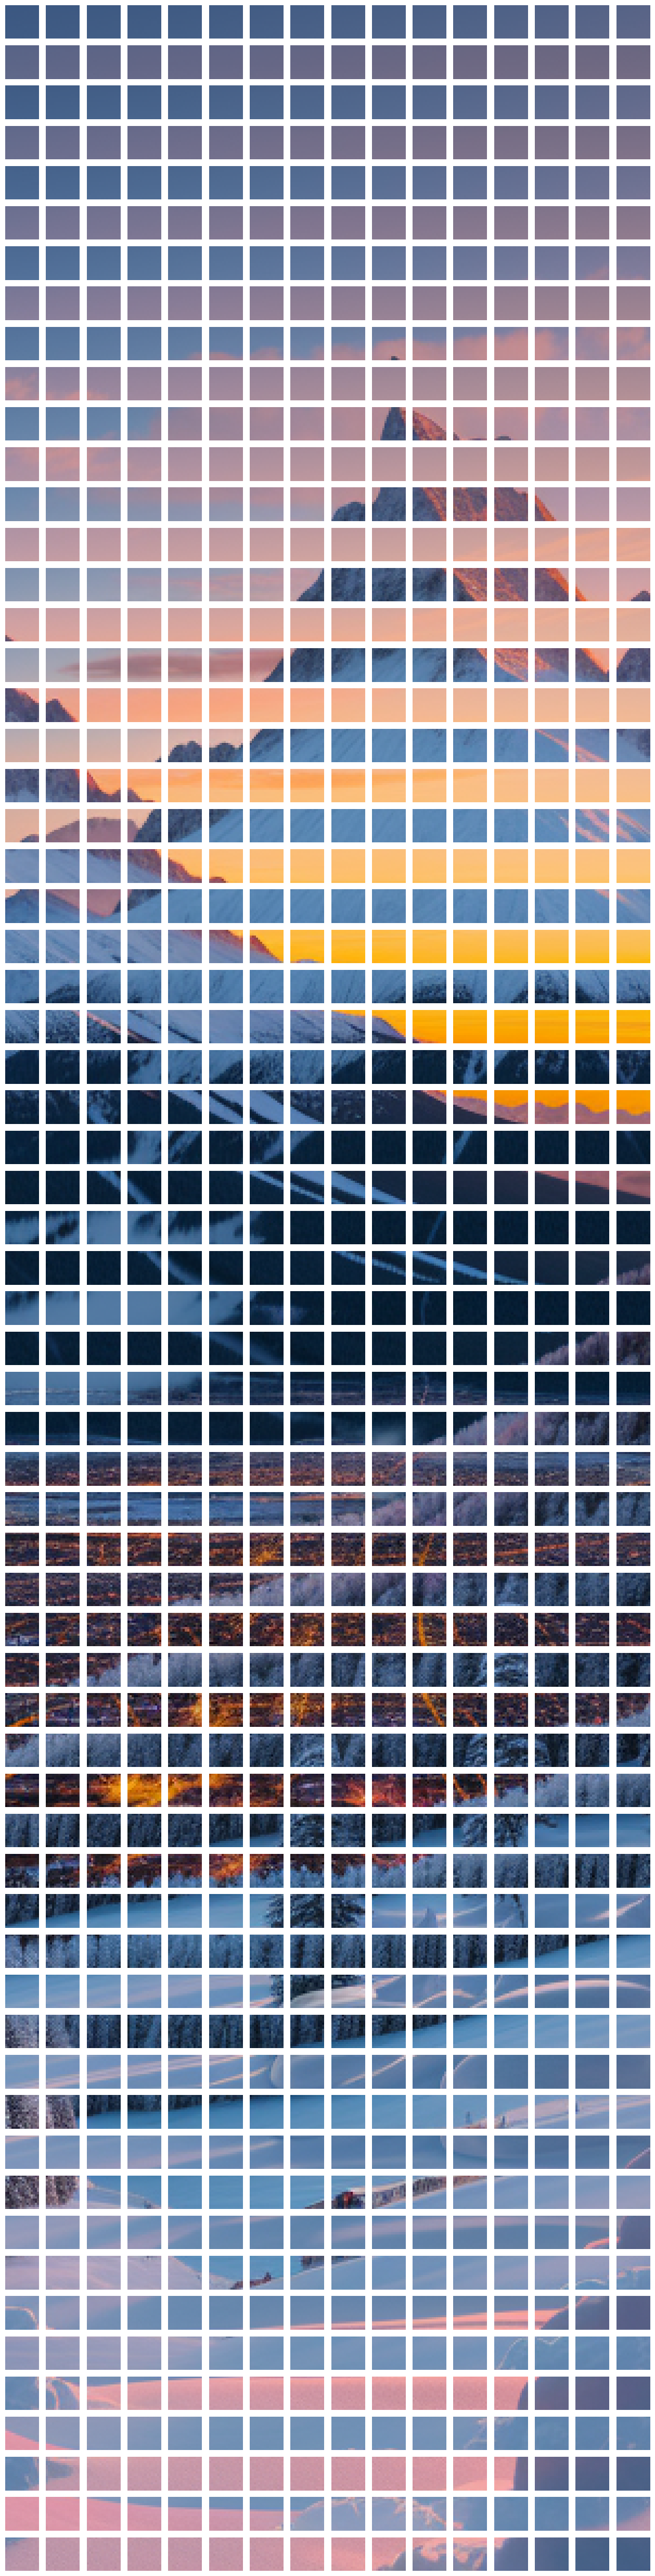

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def divide_imagen(imagen, tamano_parche):
    parches = []
    alto, ancho, _ = imagen.shape

    for y in range(0, alto, tamano_parche):
        for x in range(0, ancho, tamano_parche):
            parche = imagen[y:y+tamano_parche, x:x+tamano_parche]
            parches.append(parche)

    return parches

# Cargar la imagen
imagen_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
imagen = cv2.imread(imagen_path)

# Asegurar que la imagen sea de tamaño mínimo de 16x16
imagen = cv2.resize(imagen, (max(16, imagen.shape[1]), max(16, imagen.shape[0])))

# Dividir la imagen en parches de 16x16
tamano_parche = 16
parches = divide_imagen(imagen, tamano_parche)

# Mostrar los parches generados
num_parches = len(parches)
num_filas = num_parches // 16 + (1 if num_parches % 16 != 0 else 0)
fig, axs = plt.subplots(num_filas, 16, figsize=(16, num_filas))
for i, parche in enumerate(parches):
    if num_filas > 1:
        axs[i // 16, i % 16].imshow(cv2.cvtColor(parche, cv2.COLOR_BGR2RGB))
        axs[i // 16, i % 16].axis('off')
    else:
        axs[i % 16].imshow(cv2.cvtColor(parche, cv2.COLOR_BGR2RGB))
        axs[i % 16].axis('off')
plt.show()


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
